In [ ]:
import os
print(os.getcwd())
os.chdir('/Users/vakili/Documents/MistralBluff/')
print(os.getcwd())

In [9]:
import requests
from dotenv import load_dotenv
import os
from mistralai.client import MistralClient
from pipelines.poker_dataset.struct_to_format_llm import struct_to_format_llm
from mistralai.models.chat_completion import ChatMessage

load_dotenv()

os.environ['MISTRAL_API_KEY']='ymjotzDIdJxKj611QnrKt70VEJsHtyGm'
mistral_api_key = os.environ.get("MISTRAL_API_KEY")
mistral_job_id = '2cad6ef8-34b8-4e20-9431-db9ccccb0f1d'
BACKEND_URL = os.getenv("BACKEND_URL") or "http://127.0.0.1:8000"

client = MistralClient(api_key=mistral_api_key)
job = client.jobs.retrieve(mistral_job_id)

SETTINGS = {
    "client": client,
    "job": job
}

SETTINGS


{'client': <mistralai.client.MistralClient at 0x108278100>,
 'job': DetailedJob(id='2cad6ef8-34b8-4e20-9431-db9ccccb0f1d', hyperparameters=TrainingParameters(training_steps=180, learning_rate=0.0001), fine_tuned_model='ft:open-mistral-7b:c6d4dfa8:20240626:2cad6ef8', model='open-mistral-7b', status='SUCCESS', job_type='FT', created_at=1719433586, modified_at=1719434336, training_files=['5cd53dbf-4f32-45e6-9b15-0c69b05b2cc6'], validation_files=['ff6b09ef-e7ba-4c1f-8a25-a35681ef8c93'], object='job', integrations=[], events=[Event(name='status-updated', data={'status': 'SUCCESS'}, created_at=1719434336), Event(name='status-updated', data={'status': 'RUNNING'}, created_at=1719433587), Event(name='status-updated', data={'status': 'QUEUED'}, created_at=1719433586)], checkpoints=[Checkpoint(metrics=Metric(train_loss=0.0853, valid_loss=0.094045, valid_mean_token_accuracy=1.067359), step_number=180, created_at=1719434303), Checkpoint(metrics=Metric(train_loss=0.091283, valid_loss=0.094337, valid

In [120]:
def play(card1, card2, position, mistral_settings=None):
    ''' Returns LLM's action given cards in hands and position at the table (UTG or BB)'''
    if position == 'UTG' :
        data = {   
        "variant" : "NT",
        "game_id" : 779459871,
        "hand_nb" : 0,
        "small_blind" : 0.25,
        "big_blind" : 0.50,
        "min_bet" : 0.25,
 
        "players" : ["n0hvn", "tbmfc", "naprimer", "Log_in", "IlxxxlI", "gmjohn", "MANTISGUYV10", "BiGFck"],
        "starting_stacks" : [55.50, 28.47, 55.31, 15.15, 20, 28.76, 57.49, 17],
        "players_seats" : [1, 2, 3, 4, 5, 7, 8, 9],
 
        "button_seat" : 2,
        "player_small_blind" : "naprimer",
        "player_big_blind" : "Log_in",
 
        "player" : "IlxxxlI",
        "cards_player" : [card1, card2],
        "current_street" : "pre_flop",
 
        "dealed_cards" : {
                    "flop": [],
                    "turn": [],
                    "river": []
                   },
 
 
        "actions" : {"pre_flop" : {"players": [],
                            "actions": [],
                            "value": []},
                "post_flop" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_turn" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_river" : {
                            "players": [],
                            "actions": [],
                            "value": []
                                }
               },
 
 
        "winners" : [],
        "finishing_stacks": [],
        "card_shown_by_players" : []
        }

    elif position == 'BB':
        data = {   "variant" : "NT",
        "game_id" : 779460276,
        "hand_nb" : 0,
 
        "small_blind" : 0.25,
        "big_blind" : 0.50,
        "min_bet" : 0.25,
 
        "players" : ["n0hvn", "tbmfc", "naprimer", "Log_in", "IlxxxlI", "gmjohn", "MANTISGUYV10", "BiGFck"],
        "starting_stacks" : [55.50, 28.47, 55.06, 14.65, 20, 28.76, 58.24, 17],
        "players_seats" : [1, 2, 3, 4, 5, 7, 8, 9],
 
        "button_seat" : 3,
        "player_small_blind" : "Log_in",
        "player_big_blind" : "IlxxxlI",
 
        "player" : "IlxxxlI",
        "cards_player" : [card1, card2],
        "current_street" : "pre_flop",
 
        "dealed_cards" : {
                    "flop": [],
                    "turn": [],
                    "river": []
                   },
 
 
        "actions" : {"pre_flop" : {"players": ["gmjohn", "MANTISGUYV10", "BiGFck", "n0hvn", "tbmfc", "naprimer", "Log_in"],
                            "actions": ["f", "cc", "f", "f", "f", "f", "f"],
                            "value": [None, None, None, None, None, None, None]},
                "post_flop" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_turn" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_river" : {
                            "players": [],
                            "actions": [],
                            "value": []
                                }
               },
 "response"
 
        "winners" : [],
        "finishing_stacks": [],
        "card_shown_by_players" : []
        }
    
    #Envoie l'inférence dans le back  action = inference(data, argument_pour_inference)
    #Envoie le json data et reçoit l'action
    
    if not mistral_settings:
        route = "/predict_test"
        route = "/predict"
        response = requests.post(f'{BACKEND_URL}{route}', json=data)
        response_json = response.json()

        if 'response' in response_json:
            action = response_json['response']
            return action[0]
        else:
            raise ValueError(f"Error in response: {response_json}")
        
    else:
        hand_format_llm = struct_to_format_llm(data)
        print(hand_format_llm)
        chat_response = client.chat(
                model=job.fine_tuned_model,
                messages=[ChatMessage(role="user", content=hand_format_llm)],
                temperature = 0.3,
                max_tokens = 12,
            )
        action = chat_response.choices[0].message.content
        return action
        



In [121]:
card1 = "Ac"
card2 = "Ad"
position = "BB"
mistral_settings = SETTINGS
action = play(card1, card2, position, mistral_settings)
action

Game started:
Game ID: 779460276 0.25/0.5 (PRR) Kraken (short) - 8 (Hold'em)
Seat 3 is the button
Seat 1: n0hvn (55.5)
Seat 2: tbmfc (28.47)
Seat 3: naprimer (55.06)
Seat 4: Log_in (14.65)
Seat 5: IlxxxlI (20)
Seat 7: gmjohn (28.76)
Seat 8: MANTISGUYV10 (58.24)
Seat 9: BiGFck (17)
Player Log_in has small blind (0.25)
Player IlxxxlI has big blind (0.5)
Player IlxxxlI received card: [Ac]
Player IlxxxlI received card: [Ad]
Player gmjohn folds
Player MANTISGUYV10 checks
Player BiGFck folds
Player n0hvn folds
Player tbmfc folds
Player naprimer folds
Player Log_in folds
Player IlxxxlI 


'raises (1.25)'

In [18]:
import numpy as np
import random

def range_hands():
    '''Generate hands for all possible pairs (suited and off-suited)'''
    range_matrix = np.zeros((13, 13), dtype=object)
    suits = ["s", "h", "d", "c"]
    values = ["A", "K", "Q", "J", "10", "9", "8", "7", "6", "5", "4", "3", "2"]
    
    for i in range(13):
        for j in range(13):
            if j > i:  # Suited hands
                color = random.choice(suits)
                card1, card2 = values[i] + color, values[j] + color
                range_matrix[i][j] = card1, card2
            else:  # Off-suited hands
                colors = random.sample(suits, 2)
                card1, card2 = values[i] + colors[0], values[j] + colors[1]
                range_matrix[i][j] = card1, card2

    return range_matrix

# Example
print(range_hands())


[[('Ad', 'As') ('Ac', 'Kc') ('Ad', 'Qd') ('As', 'Js') ('Ah', '10h')
  ('Ah', '9h') ('Ad', '8d') ('Ah', '7h') ('Ad', '6d') ('As', '5s')
  ('Ah', '4h') ('Ac', '3c') ('Ad', '2d')]
 [('Ks', 'Ad') ('Kh', 'Ks') ('Kc', 'Qc') ('Kd', 'Jd') ('Kd', '10d')
  ('Kc', '9c') ('Kc', '8c') ('Ks', '7s') ('Ks', '6s') ('Kc', '5c')
  ('Kd', '4d') ('Kh', '3h') ('Kh', '2h')]
 [('Qc', 'Ah') ('Qc', 'Kd') ('Qs', 'Qd') ('Qc', 'Jc') ('Qs', '10s')
  ('Qc', '9c') ('Qh', '8h') ('Qh', '7h') ('Qs', '6s') ('Qc', '5c')
  ('Qc', '4c') ('Qs', '3s') ('Qd', '2d')]
 [('Jd', 'Ac') ('Jh', 'Kc') ('Js', 'Qd') ('Js', 'Jc') ('Jh', '10h')
  ('Jh', '9h') ('Jc', '8c') ('Jh', '7h') ('Jc', '6c') ('Jc', '5c')
  ('Jh', '4h') ('Jd', '3d') ('Jh', '2h')]
 [('10c', 'Ad') ('10c', 'Ks') ('10d', 'Qh') ('10c', 'Jh') ('10s', '10d')
  ('10s', '9s') ('10h', '8h') ('10s', '7s') ('10d', '6d') ('10s', '5s')
  ('10s', '4s') ('10h', '3h') ('10c', '2c')]
 [('9h', 'As') ('9h', 'Ks') ('9c', 'Qh') ('9d', 'Js') ('9c', '10s')
  ('9h', '9s') ('9s', '8s') ('9s',

In [110]:
def model_range_generator(position, mistral_settings):
    """Fulfill a range with LLM's actions"""
    range_matrix = range_hands()
    for i in range(13):
        for j in range(13):
            card1, card2 = range_matrix[i][j]
            action = play(card1, card2, position, mistral_settings)
            range_matrix[i][j] = action
            print(f"Action for {card1} {card2} is {action}")

    return range_matrix

In [19]:
range_matrix_bb = model_range_generator(position='BB', mistral_settings=SETTINGS)

Action for Ad Ah is raises (1.75)
Action for Ah Kh is raises (1.25)
Action for Ac Qc is raises (1.25)
Action for Ad Jd is raises (1.75)
Action for Ac 10c is raises (1.25)
Action for Ac 9c is checks
Action for Ad 8d is checks
Action for Ah 7h is raises (1.25)
Action for Ac 6c is checks
Action for Ah 5h is raises (1.25)
Action for As 4s is checks
Action for Ad 3d is checks
Action for Ac 2c is checks
Action for Kc As is raises (1.25)
Action for Ks Kh is raises (1.50)
Action for Ks Qs is raises (1)
Action for Kc Jc is raises (1.25)
Action for Kc 10c is raises (1.25)
Action for Kh 9h is raises (1.25)
Action for Kd 8d is checks
Action for Ks 7s is raises (1)
Action for Kc 6c is checks
Action for Kd 5d is checks
Action for Kc 4c is checks
Action for Kd 3d is checks
Action for Ks 2s is checks
Action for Qh Ac is raises (1.25)
Action for Qc Kh is raises (1.25)
Action for Qh Qd is raises (1.75)
Action for Qc Jc is raises (1)
Action for Qh 10h is raises (1.25)
Action for Qd 9d is raises (1.15)
Ac

MistralException: Unexpected exception (RemoteProtocolError): Server disconnected without sending a response.

In [111]:
import os
import pickle
#temperature 0.3
output_dir = "/Users/vakili/Documents/MistralBluff/data/4_results/range_utg"
position = "UTG" 
for iteration in range(100):
    range_matrix = model_range_generator(position, mistral_settings=SETTINGS)
    file_path = os.path.join(output_dir, f"range_matrix_{iteration+1}.pkl")
    with open(file_path, 'wb') as file:
        pickle.dump(range_matrix, file)
    print(f"Saved range matrix {iteration+1} to {file_path}")


Action for Ad Ac is raises (1.50)
Action for Ah Kh is raises (1.75)
Action for As Qs is raises (1.75)
Action for As Js is raises (1.25)
Action for Ad 10d is raises (1.25)
Action for Ac 9c is folds
Action for Ac 8c is folds
Action for Ad 7d is folds
Action for As 6s is folds
Action for Ac 5c is folds
Action for As 4s is folds
Action for Ah 3h is folds
Action for Ad 2d is folds
Action for Kd As is raises (1.50)
Action for Ks Kh is raises (1.50)
Action for Kh Qh is raises (1.50)
Action for Kd Jd is raises (1.50)
Action for Kd 10d is raises (1.25)
Action for Ks 9s is folds
Action for Kc 8c is folds
Action for Kc 7c is folds
Action for Kc 6c is folds
Action for Kh 5h is folds
Action for Kd 4d is folds
Action for Ks 3s is folds
Action for Kc 2c is folds
Action for Qh Ac is raises (1.25)
Action for Qs Kh is raises (1.25)
Action for Qd Qs is raises (1.50)
Action for Qd Jd is raises (1.50)
Action for Qs 10s is raises (1.25)
Action for Qs 9s is folds
Action for Qc 8c is folds
Action for Qd 7d is

In [114]:
import os
import pickle
from collections import defaultdict
import pandas as pd

def load_range_matrices(directory):
    range_matrices = []
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                range_matrix = pickle.load(file)
                range_matrices.append(range_matrix)
    return range_matrices

def count_actions(range_matrices):
    action_counts = [[defaultdict(int) for _ in range(13)] for _ in range(13)]
    
    for range_matrix in range_matrices:
        for i in range(13):
            for j in range(13):
                action = range_matrix[i][j].split()[0]
                action_counts[i][j][action] += 1
    
    return action_counts

def action_counts_to_dataframe(action_counts):
    data = {
        (i, j): {action: count for action, count in action_counts[i][j].items()}
        for i in range(13) for j in range(13)
    }
    
    df = pd.DataFrame.from_dict(data, orient='index').fillna(0).astype(int)
    return df


In [115]:
input_dir = "/Users/vakili/Documents/MistralBluff/data/4_results/range_utg"

range_matrices = load_range_matrices(input_dir)

action_counts = count_actions(range_matrices)

df_action_counts = action_counts_to_dataframe(action_counts)

df_action_counts


raises  folds
0  0      100      0
   1      100      0
   2      100      0
   3      100      0
   4      100      0
...       ...    ...
12 8        0    100
   9        0    100
   10       0    100
   11       0    100
   12       0    100

[169 rows x 2 columns]

Matplotlib is building the font cache; this may take a moment.


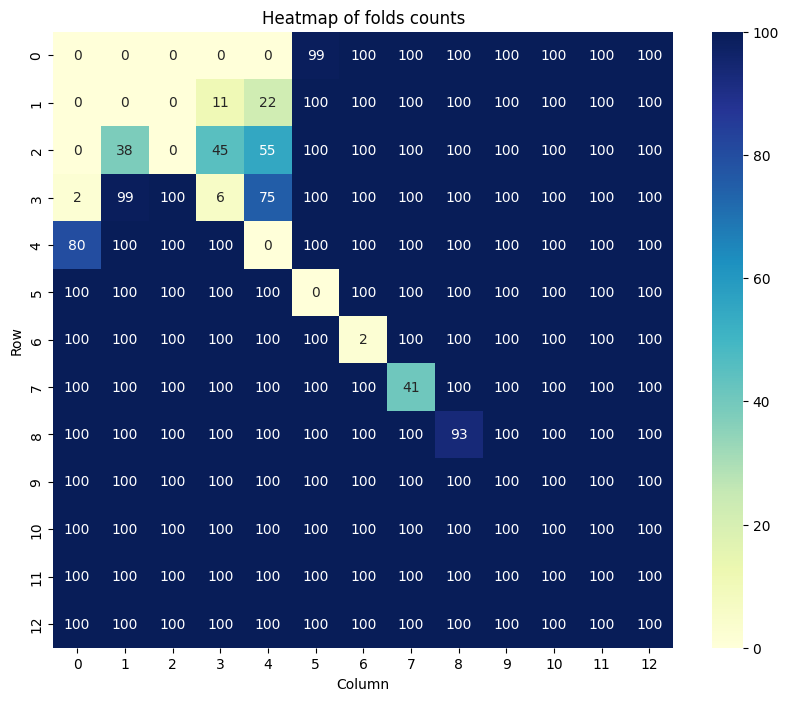

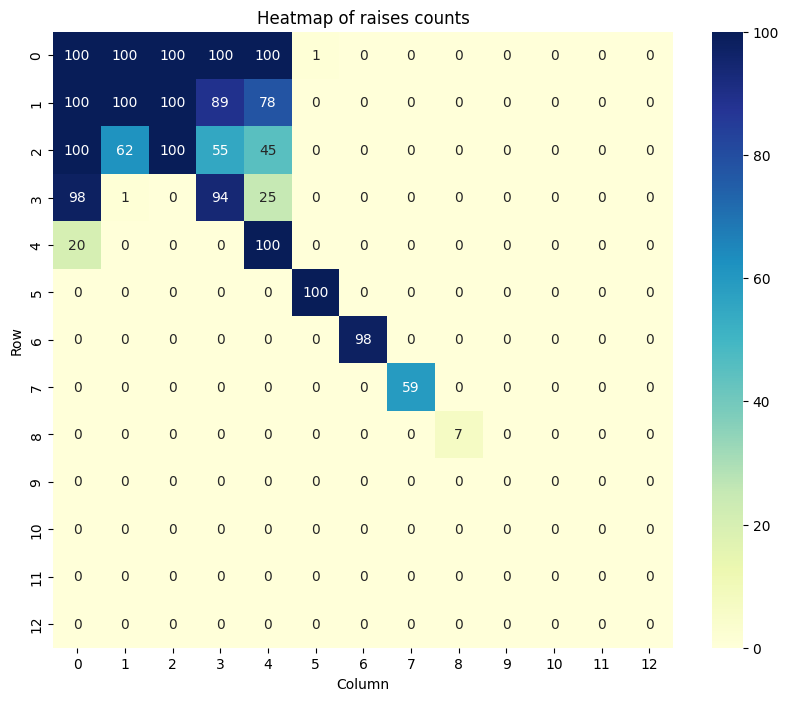

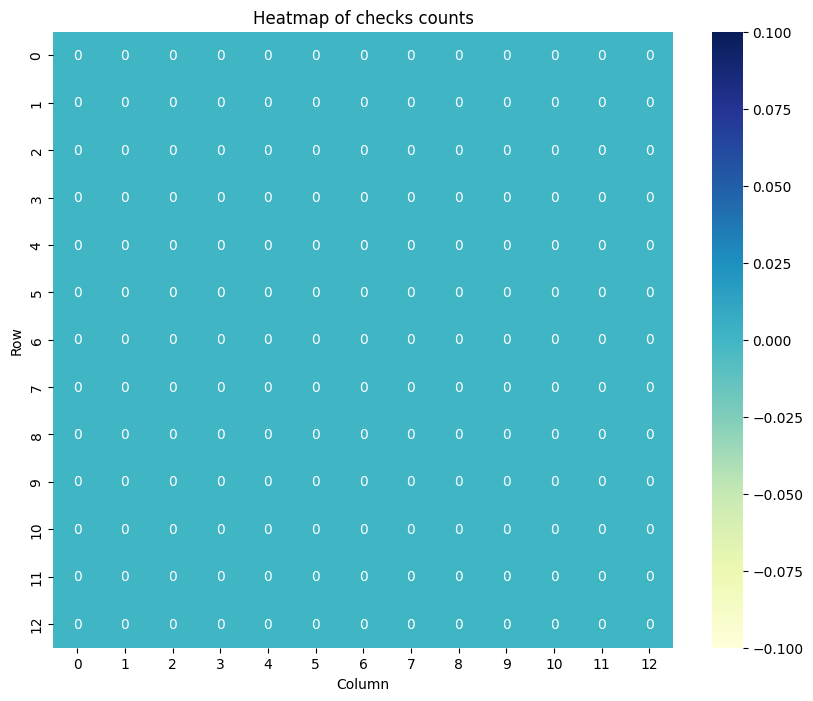

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_action_heatmap(action_counts, action):
    data = [[action_counts[i][j][action] for j in range(13)] for i in range(13)]
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Heatmap of {action} counts")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()

# Plot heatmap for 'folds'
plot_action_heatmap(action_counts, 'folds')

# Plot heatmap for 'raises'
plot_action_heatmap(action_counts, 'raises')

# Plot heatmap for 'checks'
plot_action_heatmap(action_counts, 'checks')


In [ ]:
#save the range
import pickle

folder = "./../../data/4_results/range_matrix/"
name = "range_matrix_bb"
id = "001"
with open(f"{folder}{name}_{id}.pkl", "wb") as f:
    pickle.dump(range_matrix_bb, f)

# save the hand format
data = {   "variant" : "NT",
        "game_id" : 779460276,
        "hand_nb" : 0,
 
        "small_blind" : 0.25,
        "big_blind" : 0.50,
        "min_bet" : 0.25,
 
        "players" : ["n0hvn", "tbmfc", "naprimer", "Log_in", "IlxxxlI", "gmjohn", "MANTISGUYV10", "BiGFck"],
        "starting_stacks" : [55.50, 28.47, 55.06, 14.65, 20, 28.76, 58.24, 17],
        "players_seats" : [1, 2, 3, 4, 5, 7, 8, 9],
 
        "button_seat" : 3,
        "player_small_blind" : "Log_in",
        "player_big_blind" : "IlxxxlI",
 
        "player" : "IlxxxlI",
        "cards_player" : [card1, card2],
        "current_street" : "pre_flop",
 
        "dealed_cards" : {
                    "flop": [],
                    "turn": [],
                    "river": []
                   },
 
 
        "actions" : {"pre_flop" : {"players": ["gmjohn", "MANTISGUYV10", "BiGFck", "n0hvn", "tbmfc", "naprimer", "Log_in"],
                            "actions": ["f", "cc", "f", "f", "f", "f", "f"],
                            "value": [None, None, None, None, None, None, None]},
                "post_flop" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_turn" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_river" : {
                            "players": [],
                            "actions": [],
                            "value": []
                                }
               },
 "response"
 
        "winners" : [],
        "finishing_stacks": [],
        "card_shown_by_players" : []
        }
    
with open(f"{folder}{name}_{id}_data_struct.pkl", "wb") as f:
    pickle.dump(data, f)

# save the hand format llm
hand_format_llm = struct_to_format_llm(data)
with open(f"{folder}{name}_{id}_hand_format_llm.pkl", "wb") as f:
    pickle.dump(hand_format_llm, f)
    

In [20]:
range_matrix_utg = model_range_generator(position='UTG', mistral_settings=SETTINGS)

In [21]:
#save the range
import pickle

folder = "./../../data/4_results/range_matrix/"
name = "range_matrix_utg"
id = "001"

with open(f"{folder}{name}_{id}.pkl", "wb") as f:
    pickle.dump(range_matrix_utg, f)



data = {   
        "variant" : "NT",
        "game_id" : 779459871,
        "hand_nb" : 0,
        "small_blind" : 0.25,
        "big_blind" : 0.50,
        "min_bet" : 0.25,
 
        "players" : ["n0hvn", "tbmfc", "naprimer", "Log_in", "IlxxxlI", "gmjohn", "MANTISGUYV10", "BiGFck"],
        "starting_stacks" : [55.50, 28.47, 55.31, 15.15, 20, 28.76, 57.49, 17],
        "players_seats" : [1, 2, 3, 4, 5, 7, 8, 9],
 
        "button_seat" : 2,
        "player_small_blind" : "naprimer",
        "player_big_blind" : "Log_in",
 
        "player" : "IlxxxlI",
        "cards_player" : ["CARD1", "CARD2"],
        "current_street" : "pre_flop",
 
        "dealed_cards" : {
                    "flop": [],
                    "turn": [],
                    "river": []
                   },
 
 
        "actions" : {"pre_flop" : {"players": [],
                            "actions": [],
                            "value": []},
                "post_flop" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_turn" : {
                            "players": [],
                            "actions": [],
                            "value": []},
                "post_river" : {
                            "players": [],
                            "actions": [],
                            "value": []
                                }
               },
 
 
        "winners" : [],
        "finishing_stacks": [],
        "card_shown_by_players" : []
        }




array([['raises (1.50)', 'raises (1.25)', 'raises (1.50)',
        'raises (1.50)', 'raises (1.25)', 'folds', 'folds', 'folds',
        'folds', 'folds', 'folds', 'folds', 'folds'],
       ['raises (1.50)', 'raises (1.50)', 'raises (1.50)', 'folds',
        'raises (1.25)', 'folds', 'folds', 'folds', 'folds', 'folds',
        'folds', 'folds', 'folds'],
       ['raises (1.50)', 'folds', 'raises (1.75)', 'folds', 'folds',
        'folds', 'folds', 'folds', 'folds', 'folds', 'folds', 'folds',
        'folds'],
       ['raises (1.25)', 'folds', 'folds', 'raises (1.50)', 'folds',
        'folds', 'folds', 'folds', 'folds', 'folds', 'folds', 'folds',
        'folds'],
       ['raises (1.50)', 'folds', 'folds', 'folds', 'raises (1.50)',
        'folds', 'folds', 'folds', 'folds', 'folds', 'folds', 'folds',
        'folds'],
       ['folds', 'folds', 'folds', 'folds', 'folds', 'raises (1.50)',
        'folds', 'folds', 'folds', 'folds', 'folds', 'folds', 'folds'],
       ['folds', 'folds', 'f

In [ ]:
def range_accuracy(range1, range2):
    '''Calcule accuracy of range1 according to a reference range range2'''
    matching_actions = 0
    for i in range(13):
        for j in range(13):
            if range1[i][j] == range2[i][j] :
                matching_actions += 1
    return matching_actions/(13*13)